# EDA Математическая статистика

###  Содержание <a class="anchor" id=0></a>
- [1. Введение](#1)
- [2. Описательная статистика. Меры центральной тенденции в Python](#2)
- [3. Корреляция](#3)
- [4. Типы корреляции. Корреляция Пирсона](#4)
- [5. Типы корреляции. Ранговые корреляции](#5)
- [6. Визуализация корреляции. Матрица корреляции. График рассеяния](#6)
- [7. Проверка](#7)
- [8. Итог](#8)

## Введение <a class="anchor" id=1></a>

[к содержанию](#0)

Статистика очень тесно связана с машинным обучением. Этот раздел математики помогает ответить, какие из признаков важны, позволяет выдвигать и проверять гипотезы и идеи. Статистика лежит в основе алгоритмов машинного обучения, методов разведывательного анализа данных. С элементами математической статистики мы столкнёмся в каждом модуле этого курса.


>**Математическая статистика** — раздел математики, который занимается систематизацией и обработкой данных для их использования и получения выводов.

Данные, собранные в ходе исследования каких-то явлений или процессов, сами по себе не очень информативны. Чтобы извлечь из данных какие-то полезные идеи, применяется описательная статистика, которую мы и будем изучать в этом модуле.

>Например, мы исследуем, от каких факторов зависит удовлетворенность жизнью, имея на руках информацию о доходах населения. Сами по себе эти данные мало что дают. 

Проанализировав этот признак, с помощью знаний описательной статистики мы получим примерно такие статистические данные:

* средний доход;
* средний доход в регионе проживания;
* средний доход в разрезе пола;
* разница между минимальным и максимальным доходом;
* а также другие показатели, которые могут охарактеризовать доход человека более детально. 

После извлечения идей мы получаем статистические данные.

**Статистические данные — упорядоченные, классифицированные данные о каком-то явлении или процессе.**

Так как в процессе получения статистических данных появляются новые признаки, то этот процесс касается не только математической статистики, но и проектирования признаков — ещё одной части разведывательного анализа данных, который будет изучен в следующем модуле. 

Прежде чем применять математические статистики к разведывательному анализу данных, необходимо изучить описательные статистики — с ними мы познакомимся в следующем юните. Без понимания этих основ будет невозможно двигаться дальше по всем этапам машинного обучения.



## Описательная статистика. Меры центральной тенденции в Python <a class="anchor" id=2></a>

[к содержанию](#0)

Описательную статистику можно применять к одной переменной или к целому набору данных. 

Описательную статистику мы рассмотрим на примере подготовленного и очищенного вами в модуле EDA-1. Юнит 5. Проверка.

[скачать датасет](https://drive.google.com/file/d/1Xwo8bXV6TA9o14cvcElb-zbzNoAAkQi6/view?usp=sharing)

Когда вы описываете и вычисляете характеристики одной переменной, вы выполняете **одномерный анализ**. 

>Например, вы хотите узнать больше о сомелье, которые давали подробный отзыв вину. Вы анализируете признак независимо от других, как будто в датасете не существует других признаков. Вы можете просмотреть, сколько сомелье приняло участие в обзоре вин. Можете проанализировать информацию и увидеть, какой сомелье чаще всего оценивал вино. Возможно, эта информация будет важна, и на этапе проектирования и преобразования признаков мы обработаем признаки на основе этих выводов. 

Когда вы анализируете пару переменных и больше, то вы делаете **многомерный анализ**. Целью такого анализа является нахождение связей между признаками. 

>Мы можем проанализировать, есть ли связь между сортом винограда и ценой бутылки вина. Для этого используется корреляционный анализ, с которым мы познакомимся в следующем юните. Для оценки рейтинга вина можем оценить статистическую значимость переменных, которую мы изучим в следующих модулях. Например, если цена за бутылку вина окажется неважным признаком, то мы сможем удалить его из датасета, так как он не влияет на рейтинг вина.

К одномерному анализу вы можете отнести вычисление максимальных и минимальных значений какого-либо признака, вычисление средних значений, часто встречающихся значений и размаха. 

In [2]:
import pandas as pd

df = pd.read_csv("wine_cleared.csv")

In [3]:
df['price'].describe()

count    129971.000000
mean         35.363389
std          39.577066
min           4.000000
25%          18.000000
50%          28.000000
75%          40.000000
max        3300.000000
Name: price, dtype: float64

**Вычисление среднего** также относится к одномерному анализу. Но что значит среднее?

>Например, средняя зарплата в Краснодарском крае составляет 43 000 руб. Это число даёт нам представление о среднестатистическом жителе этого края. 

Но что здесь означает средняя зарплата и среднестатистический житель? Среднее арифметическое, середина распределения или что-то другое? Чтобы ответить на этот вопрос, нам необходимо знать, что такое мера центральной тенденции.

**Мера центральной тенденции** — это число, которое описывает так называемое «среднее» признака. Мера центральной тенденции может рассчитываться по-разному в зависимости от типа признака или от его распределения.

>Далее мы рассмотрим наиболее популярные меры центральной тенденции, используемые в машинном обучении: среднее арифметическое, медиана, мода. Для расчёта этих описательных статистик в Python мы будем пользоваться библиотекой [statistics](https://docs.python.org/3/library/statistics.html). Она предоставляет готовые функции для вычисления математической статистики для числовых данных.

Установим библиотеку:

>pip install statistics

Импортируем библиотеку для дальнейшего использования:

>import statistics

In [4]:
import statistics

**Среднее арифметическое** — сумма всех элементов, поделённая на количество элементов в числовом ряду или признаке (`Series`).

In [5]:
# Средняя стоимость бутылки округлённая до сотен
round(statistics.mean(df['price']),2)

35.36

In [6]:
df['price'].mean()

35.36338912999136

**Среднее арифметическое** хорошо работает для признаков с небольшим разбросом в значениях, например чтобы корректно вычислять средний возраст популяции. Однако оно **плохо работает для признака с большим разбросом **в значениях. 

>Возьмём в пример рост человека. Если в выборке попадутся игроки баскетбольной команды или карлики, представление о среднем росте человека сильно исказится. Если таких значений в выборке будет мало, скорее всего, они будут обработаны на этапе очистки данных от выбросов. Если после очистки данных большой разброс останется, вы можете снова вернуться к этому этапу, так как цикл машинного обучения не линеен, или использовать другую описательную статистику для получения среднего значения.

### МЕДИАНА

**Медиана** — средний элемент распределения. Для расчёта медианы должно выполняться одно условие: числовой ряд должен быть предварительно отсортирован. Только так мы сможем корректно рассчитать средний элемент. Признак может быть отсортирован как по возрастанию, так и по убыванию. 

Методы современных библиотек, в том числе и используемой нами statistics для вычисления медианы, самостоятельно выполняют сортировку данных — вам не нужно заботиться об этом. 

<img src=e_2_img1.png>

Если количество элементов чётное, медианой будет среднее арифметическое двух средних элементов распределения.

<img src=e_2_img2.png>

In [7]:
# Медианная стоимость бутылки (округлённое до сотен)

round(statistics.median(df['price']),2)

28.0

In [8]:
# Медианная стоимость стандартными методами python

count_price = len(df['price']) # количество записей цен
sorted_price = sorted(df['price']) # отсортированные цены

if count_price % 2: # при нечетном кол-ве элементов выбираем средний по индексу 
    median = sorted_price[round(0.5*(count_price-1))]
else: # при четном кол-ве элементов выбираем 2 средних по индексу и считаем между ними среднее арифметическое
    index = sorted(x), round(0.5 * count_price)
    median_ = 0.5 * (sorted_price[index-1] + sorted_price[index])
median

28.0

В отличие от среднего арифметического медиана хорошо справляется с разбросом в значениях, поэтому её чаще используют. Также медиана разбивает данные на две группы, состоящие из одинакового количества элементов.

Средние значения, например уровень дохода или цена на недвижимость, часто вычисляются именно по медиане, потому что в этом случае важен средний уровень доходов большей части населения. 

В таком случае основатель Amazon Джефф Безосс с годовым доходом в несколько миллиардов не испортит нам всю статистику. 

Также в библиотеке `statistics` есть функции, связанные с медианой, — функция `statistics.median_low()` и функция `statistics.median_high()`.

>В случае, когда количество элементов в числовом ряду (серии) нечётное, функции возвращают то же, что и `median()`.

В случае, когда количество элементов чётное, у нас получается два средних значения:

`median_low()` возвращает меньшее из них;
`median_high()` возвращает большее из них.

>**Примечание**. Если в вашем наборе данных есть пропущенные значения, функции библиотеки `statistics` в отличие от других методов (например `np.median()` из библиотеки numpy) будут автоматически игнорировать пропущенные значения, не выдавая ошибку.

### МОДА

**Мода** — самый часто встречающийся элемент в числовом ряду.

>Допустим, вы решили полететь в отпуск со своими друзьями и решили выбрать месяц. Вы провели опрос, кому в какой месяц было бы удобнее. Месяцы в году — это числовой ряд от 1 до 12. Дима и Серёжа свободны в феврале. Толя может взять отпуск в любой месяц года, а Ксюша может только в июне. Как в этом случае поступите вы?

Очевидно, выберете месяц, который выбрало большинство; остальные подстроятся либо не полетят с вами.

Чаще всего **мода** используется в нечисловых рядах. Например самая популярная порода собак, фильм года, лучшие рестораны вычисляются именно модой.

In [9]:
# Мода стоимость бутылки (округлённое до сотен)

round(statistics.mode(df['price']),2)

35.36

Моду также можно вычислить при помощи [statistics.multimode()](https://docs.python.org/3/library/statistics.html#statistics.multimode). В случае наличия нескольких модовых (популярных значений) функция `statistics.mode()` вернёт вам ошибку StatisticsError, а `statistics.multimode()` — список с всеми вычисленными модовыми значениями.

In [11]:
df['price'].mode()
mode = round(df["price"].value_counts().index[0],2)
mode

35.36

Мы рассмотрели самые основные и часто используемые в машинном обучении меры центральной тенденции. Также к мерам центральной тенденции относятся:

* `среднее геометрическое`;
* `среднее гармоническое`;
* `средневзвешенное` 
* и другие.

Их также можно вычислить с помощью библиотеки `statistics`, но они реже используются для описания распределения в машинном обучении.

Такие более сложные описательные статистики, как стандартное отклонение, меры разброса, вы изучите в следующих юнитах, посвящённых математической статистике.

В этом юните мы рассмотрели очень важную идею **«среднего значения»**. Она часто применяется в разведывательном анализе данных. Цель среднего значения, как и других описательных статистик — выразить распределение признака одним числом, отразить его суть, что может оказаться важным признаком для модели машинного обучения.

## Корреляция <a class="anchor" id=3></a>

[к содержанию](#0)

`Корреляция` — статистическая связь двух и более переменных. При изменении значения одной из переменных происходит закономерное изменение другой или других величин. 

Например, при взрослении у человека меняются его показатели: рост становится больше, риск сердечно-сосудистых заболеваний — выше.

Мерой связи величин, мерой корреляции является **коэффициент корреляции**. Он может принимать значение от -1 до +1.

**Отрицательная** корреляция, **коэффициент корреляции < 0** говорит об обратной связи между переменными. При обратной связи увеличение одной из величин ведёт к закономерному уменьшению другой (других) величин. 

>Например, чем больше сумма активного долга, тем меньше шанс в одобрении кредита.

**Положительная** корреляция, **коэффициент корреляции > 0** говорит о прямой связи между переменный. При прямой связи увеличение одной из величин ведёт к закономерному увеличению другой (других) величин. 

>Например, с увеличением возраста размер ноги человека увеличивается, и его рост увеличивается тоже.

**Коэффициент корреляции = 0** говорит о том, что переменные независимы друг от друга, по крайней мере линейно, но это вовсе не значит, что между ними нет какой-то более сложной взаимосвязи. Это достаточно редкое явление, которое может встретиться на конкретном наборе данных.

Понимание корреляции приводит нас к понятию **мультиколлинеарности** — такой сильной зависимости переменных друг от друга, что она затрудняет анализ и оценку будущей модели машинного обучения. 

Понять, почему это плохо для модели машинного обучения, вы сможете, когда приступите к обучению моделей. Но уже на этапе разведывательного анализа данных вы сможете выявить такие зависимости.

Как понять, существует ли сильная взаимозавимость признаков? Для этого существует примерная шкала степеней силы связи и коэффициента корреляции между признаками.

В таблице отражены основные силы связи между признаками.

**Сила связи	Значение коэффициента корреляции**

* Отсутствие связи или очень слабая связь   -   `0…+/- 0.3`
* Слабая связь  -   `+/- 0.3…+/- 0.5`
* Средняя связь -   `+/- 0.5…+/- 0.7`
* Сильная связь -   `+/- 0.7…+/- 0.9`
* Очень сильная или абсолютная связь    -   `+/- 0.9…+/-1`

Принято считать, что при коэффициенте корреляции `+/-0,7` связь между признаками сильная и приводит к `мультиколлинеарности`.

>Например, сложилась ситуация, когда в датасете были обнаружены признаки с очень сильной корреляцией. Мы знаем, что мультиколлинеарность вредит такой модели, поэтому на этапе проектирования признаков можем объединить эту пару признаков в один или удалить из этой пары один — тот, что менее важен. Важность признаков мы оцениваем позже, на этапе отбора признаков.

Так что для этапа корреляционного анализа достаточно делать и запоминать выводы о взаимосвязях признаков, чтобы на дальнейшем этапе разведывательного анализа данных правильно их обработать. Эти этапы мы изучим позже в курсе, в юнитах про разведывательный анализ данных.

### Для расчёта коэффициента корреляции применим функцию [df.corr()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) библиотеки pandas.

In [12]:
df.corr()

,Unnamed: 0,points,price
Unnamed: 0,1.000000,0.007124,0.004652
points,0.007124,1.000000,0.402137
price,0.004652,0.402137,1.000000


Результатом функции `df.corr()` является матрица корреляции. 

>**Матрица корреляции** — таблица, заголовками и строками которой являются названия признаков в датасете. На пересечении строк и столбцов находится значение коэффициента корреляции этих двух признаков.

Данная матрица имеет значение 1 по главной диагонали, так как единица означает корреляцию признака с самим собой. Матрица является симметричной. 

<img src=e_2_img3.png>

Визуализация матрицы корреляций на примере датасета о пассажирах «Титаника». Источник: kaggle

На рисунке вы можете увидеть визуализированную матрицу к одному из соревнований на kaggle. Наибольшая связь наблюдается в паре признаков age и age_bucket — 0.98, что по шкале корреляции является очень сильной связью и приводит к мультиколлинеарности признаков. Скорее всего, один из признаков будет исключён из датасета.

Подобную матрицу мы научимся строить в одном из следующих юнитов, посвящённых визуализации корреляций.

В нашей матрице датасета винных обзоров отражено всего два признака — `points`, `price`.  На пересечении признаков мы видим значение коэффициента корреляции между признаками `points` и `price`.

<img src=e_2_img4.png>

Матрица корреляции. построенная при помощи `df.corr()`. Зелёным выделена главная диагональ.

Причина в том, что рассчитать коэффициент корреляции мы можем только в том случае, когда признак имеет численное выражение. Как мы выяснили ранее, остальные признаки — в строковом формате, и расчёт коэффициента корреляции невозможен. Для этого необходимо провести кодирование признака, которое мы будем изучать далее.

## Корреляция != Коузация

Корреляция и причинно-следственная связь — это понятия, которые чаще всего **ошибочно приравниваются друг к другу**. Понимание корреляции важно для разведывательного анализа и помогает делать правильные выводы. 

### ЛОЖНАЯ КОРРЕЛЯЦИЯ

Рассмотрим, почему корреляция не подразумевает причинно-следственных связей, на популярном примере.

Продажи мороженого коррелируют с убийствами!

По мере роста или падения продаж замороженного десерта соответственно растёт или уменьшается количество убийств. Является ли потребление замороженного десерта причиной смерти людей?

Нет. Эти две вещи взаимосвязаны, но это не значит, что одна вызывает другую.

Этот случай можно назвать совпадением, и чаще всего корреляция наблюдается именно в таких ситуациях. А иногда нам просто не хватает данных, чтобы уловить причину связи между переменными.

В некоторых случаях участвуют скрытые факторы. Например, в примере с мороженым улучшение погоды вызывает рост продаж десерта, а большое количество людей на улицах создаёт благоприятные условия для убийц.

Нет причинно-следственной связи между убийствами и продажей мороженого, а наличие третьего фактора — хорошей погоды — объясняет эти связи. Этот случай называется **ложной корреляцией**.

## Типы корреляции. Корреляция Пирсона <a class="anchor" id=4></a>

[к содержанию](#0)

В методе `.corr()`

Аргумент `method` указывает на название используемого метода расчёта корреляции: '`pearson`' — корреляция Пирсона, '`kendall`' — корреляция Кендалла, '`spearman`' — корреляция Спирмена. Каждый метод может быть применён для разных типов данных. Давайте разберёмся, чем отличаются эти методы и для каких типов данных применять каждый из них.

### КОРРЕЛЯЦИЯ ПИРСОНА

Рассчитав в прошлом юните коэффициент корреляции между `point` и `price`, мы использовали `df.corr()`. Согласно документации, если не указать `method`, по умолчанию используется корреляция Пирсона. Верно ли это для наших признаков?

Коэффициент корреляции Пирсона используется для вычисления линейной взаимосвязи между признаками. 

>Линейная взаимосвязь — вид связи между признаками, в котором изменение одного признака x1 всегда приводит к изменению другого признака x2 на величину, пропорциональную изменению x1, в соответствии с правилом: x2 = ax1 + b (уравнение прямой), где a и b — некоторые коэффициенты.

<img src=e_2_img5.png>

Определить существование линейной связи в паре признаков эмпирическим путем можно, если вы можете формулировать фразу про признаки: «С уменьшением/увеличением признака 1 уменьшается/увеличивается признак 2 в соответствии с некоторым уравнением прямой». 

Например, с увеличением возраста заёмщика уменьшается количество дней просрочки по кредиту. 

<img src=e_2_img6.png>

>Более точной является визуализация зависимости признаков. С этим подходом мы подробнее познакомимся в следующем юните, посвящённом визуализации связей между признаками.

Для большинства непрерывных признаков это подходящий метод вычисления коэффициента корреляции. Однако при его использовании вы предполагаете, что признаки приблизительно нормально распределены и не имеют выбросов.

### НОРМАЛЬНОЕ РАСПРЕДЕЛЕНИЕ

Большинство окружающих нас процессов и явлений, характеристик объектов можно описать **нормальным распределением**. В основном это переменные, которые зависят от множества факторов, например рост человека. Он сформировался благодаря местности, в которой проживает человек, генетическим предрасположенностям, перенесённым заболеваниям и так далее. Как следствие, показатели роста подвергаются законам нормального распределения.

Если признак является совокупностью очень редких событий, например аварии на дорогах, то распределение признака **нормальным не будет**.

С точки зрения визуализации нормальное (**гауссово**) распределение представляет собой распределение признака в виде колокола.

Нормальность распределения признака можно определить визуально, построив гистограмму распределения непрерывного признака или так называемый `q-q plot`. Подробнее о принципе построения данного графика советуем прочитать [здесь](https://habr.com/ru/post/578754/).

<img src=e_2_img7.png><img src=e_2_img8.png>

На гистограмме распределение должно напоминать колокол (левый график на рисунке), а `q-q plot` должен напоминать прямую линию (правый график на рисунке).

>Давайте проверим наши данные винных обзоров на нормальность, используя метод визуализации.

Для этого воспользуемся пакетом `stats` статистических распределений и функций, а также знакомой нам библиотекой `matplotlib` для построения графиков.

Код для построения графиков:

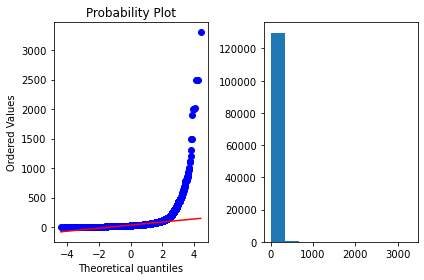

In [13]:
import matplotlib.pyplot as plt # библиотека визуализации
from scipy import stats # библиотека для расчетов

plt.subplot(1, 2, 1) # задаем сетку рисунка количество строк и столбцов
stats.probplot(df['price'], plot=plt) # qq plot

plt.subplot(1, 2, 2) # располагаем второй рисунок рядом
plt.hist(df['price']) # гистограмма распределения признака

plt.tight_layout() # чтобы графики не наезжали другу на друга, используем tight_layout

plt.show() # просмотр графика

Графики распределение признака `price`.

Кажется, признак распределён ненормально, так как `q-q plot` имеет изогнутую линию, а гистограмма распределения совершенно не похожа на колокол.

Такой признак при анализе Пирсоном может выдать некорректные результаты. Для таких случаев существуют другие виды корреляций или проводится операция по приведению признака к нормальному путём преобразований, которые вы освоите позже, в юнитах про разведывательный анализ данных.

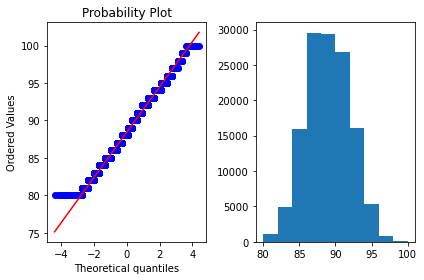

In [18]:
# Для признака points
plt.subplot(1, 2, 1) # задаем сетку рисунка количество строк и столбцов
stats.probplot(df['points'], plot=plt) # qq plot

plt.subplot(1, 2, 2) # располагаем второй рисунок рядом
plt.hist(df['points']) # гистограмма распределения признака

plt.tight_layout() # чтобы графики не наезжали другу на друга, используем tight_layout


plt.show() # просмотр графика

Если точки на графике `Q-Q Plot` стелятся вдоль какой-то прямой, то наши данные неплохо соответствуют теоретическим квантилям, отложенным по горизонтальной оси.

Если мы строим `Q-Q Plot` от теоретических квантилей стандартного нормального распределения, то:

* Значение получившейся функции в нуле — это **медиана нашей выборки**. Вообще все квантили нашей выборки соответствуют квантилям распределения на оси x, а не только медиана :)

* Тангенс линии тренда соответствует **стандартному отклонению нормального распределения**, наилучшим образом описывающем нашу выборку. Значение линии главного тренда в нуле соответствует его среднему значению

* Равномерное распределение - это S-образная кривая, стелющаяся вдоль линии тренда, бимодальное распределение - это S-образная кривая, пересекающая линию тренда. t-распределение - это зеркально отраженная S-образная кривая.

In [17]:
statistics.mode(df['points'])

88

* Корреляция между **непрерывными признаками**, которые имеют близкое к **нормальному распределение**, может быть рассчитана с использованием стандартной корреляции **Пирсона**. 

* **Для категориальных данных используется методы ранговой корреляции**, например Спирмена и Кендалла, которые будут изучены в следующем юните. 

* Для непрерывных переменных, имеющих большое количество выбросов или распределённых ненормально, могут использоваться методы по устранению выбросов и нормализации данных, которые будут изучены далее в курсе. Также могут быть использованы методы ранговой корреляции.


## Типы корреляции. Ранговые корреляции <a class="anchor" id=5></a>

[к содержанию](#0)

## Визуализация корреляции. Матрица корреляции. График рассеяния <a class="anchor" id=6></a>

[к содержанию](#0)

## Проверка <a class="anchor" id=7></a>

[к содержанию](#0)

## Итоги <a class="anchor" id=8></a>

[к содержанию](#0)